# Contrast Response Functions

- Stimulus contrast can be plotted against the mean spike rate (2000–3000 ms in this data) to produce a contrast response function, which is a roughly sigmoid shaped function.
- If you plot control and adapted contrast response functions you will find that adaptation "squishes" the contrast responses downwards (firing is attenuated following adaptation) and rightward (it takes higher contrasts to elicit a desired spike rate).




## Contrast Response Functions

Plot stimulus contrast (*x*) against the mean spike rate (*y*) during the stimulus "on" period (2000–3000 ms) to produce a contrast response function (CRF), which is a roughly sigmoid-shaped function.

Plot the CRF for the two conditions on the same plot, with one subplot per neuron. 


# ANSWER:

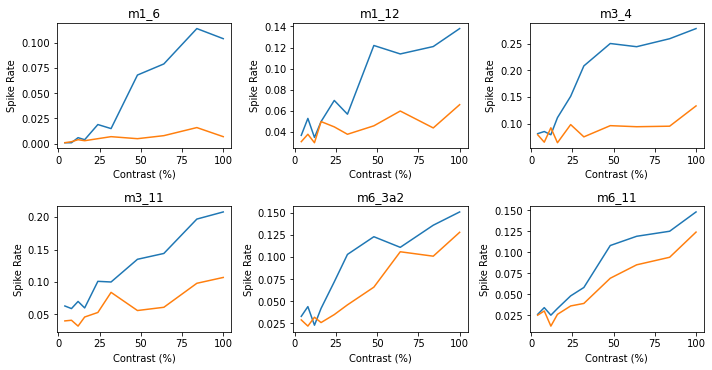

In [43]:
# select data based on time window
df_stim = df[(df['time'] > stim_on_time) & (df['time'] <= stim_off_time)]

fig = plt.figure(figsize=[10,15])
subplot_counter = 1

for neuron in neuron_labels:
    neu_dat = df_stim[(df_stim['neuron'] == neuron)]

    ax = fig.add_subplot(num_neurons, 3, subplot_counter)

    for cond in cond_labels:
        
        tmp_dat = neu_dat[(neu_dat['condition'] == cond)] 

        spike_rate = np.zeros([num_contr, 2])

        for contr in enumerate(contr_labels):
            spike_count = tmp_dat[(tmp_dat['contrast'] == contr[1]) &
                                  (tmp_dat['spike'] == 1)
                                 ]['spike'].count()

            spike_rate[contr[0]][0] = contr[1]
            spike_rate[contr[0]][1] = spike_count / (stim_off_time - stim_on_time)
            
        ax.plot(spike_rate[:,0], spike_rate[:,1])
                
    plt.title(neuron )
    plt.xlabel('Contrast (%)')
    plt.ylabel('Spike Rate')
    subplot_counter += 1
    plt.tight_layout()

plt.show()

<font color='#0F4C81'>
<h2> 
    Q17
    </h2>

## Neural Latency (latency to first spike)
You can measure neural latency in the control condition, and latency is expected to decrease with increasing contrast.

Using a format similar to the CRFs, make a plot of latency to first spike (computed as the mean across repetitions) on the *y* axis, against contrast on the *x* axis, using one subplot per neuron (with both conditions in one subplot).
</font>

# ANSWER:

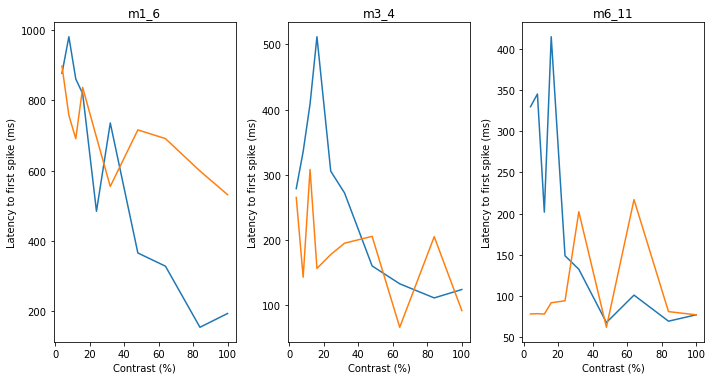

In [49]:
# select data based on time window
df_stim = df[(df['time'] > stim_on_time) & (df['time'] <= stim_off_time)]

fig = plt.figure(figsize=[10,15])
subplot_counter = 1

for neuron in neuron_labels:
    neu_dat = df_stim[(df_stim['neuron'] == neuron)]

    ax = fig.add_subplot(num_neurons, 3, subplot_counter)

    for cond in cond_labels:
        
        tmp_dat = neu_dat[(neu_dat['condition'] == cond)] 

        ltfs = np.zeros([num_contr, 2])

        for contr in enumerate(contr_labels):
            first_spikes = np.zeros(len(rep_labels))
            for rep in rep_labels:
                if len(tmp_dat[(tmp_dat['contrast'] == contr[1]) &
                                          (tmp_dat['repetition'] == rep) &
                                          (tmp_dat['spike'] == 1)
                                         ]['time']) > 0:
                    first_spikes[rep-1] = (min(tmp_dat[(tmp_dat['contrast'] == contr[1]) &
                                              (tmp_dat['repetition'] == rep) &
                                              (tmp_dat['spike'] == 1)
                                             ]['time']
                                     ))
                else:
                    first_spikes[rep-1] = stim_off_time  # maybe not the best choice

            ltfs[contr[0]][0] = contr[1]
            ltfs[contr[0]][1] = first_spikes.mean() - stim_on_time
            
        ax.plot(ltfs[:,0], ltfs[:,1])
        
    plt.title(neuron)
    plt.xlabel('Contrast (%)')
    plt.ylabel('Latency to first spike (ms)')
    subplot_counter += 1
    plt.tight_layout()

plt.show()